In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!ls /content/drive/My\ Drive

'AI prestentation.gdoc'			     movies_metadata.csv
 Classroom				     new.csv
'Colab Notebooks'			     Nupur_Project_ppt.pptx
 df1_meta.csv				     predictions_plot.png
'Fake Postings.csv'			    'Project proposal.gdoc'
'Fendous  blood group detection app.gdoc'    reviews.txt
'Fendous@ detection of phishing mail.gdoc'   Singh_nupur.pdf
'kaggle (5).json'			     Sleep_health_and_lifestyle_dataset.csv
'LISTEN TO YOUR HEART.gslides'		    'spam (1).csv'
 movie_metadata.csv			     tmdb_5000_movies1.csv


In [ ]:
 csv_path = "/content/drive/My Drive/Fake Postings.csv"
 df = pd.read_csv(csv_path)

In [ ]:
data = df.head()

In [ ]:
data

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent
0,Mental health nurse,Arm drive court sure vote. Earn $5000/week! Im...,"Basic knowledge in live, no degree required. F...",Rivera and Sons - Established 2022.,West Jeffrey,$55016-$100476,Internship,IT,Free meals,1
1,Conference centre manager,Government whom its bed go tax tree black. Ear...,"Basic knowledge in seek, no degree required. F...","Davidson, Jones and Gomez - Established 2003.",Lake Meredithberg,$53438-$93138,Part-Time,Finance,Flexible hours,1
2,"Engineer, land",I member discuss follow way there nation. Earn...,"Basic knowledge in worker, no degree required....",Allen Ltd - Established 1998.,Lake Cathybury,$45584-$105229,Part-Time,IT,Free travel,1
3,Forest/woodland manager,House across wait approach face. Earn $5000/we...,"Basic knowledge in example, no degree required...",Forbes Ltd - Established 1990.,South Matthewstad,$66188-$139621,Full-Time,Education,Free travel,1
4,"Production designer, theatre/television/film",Case best environmental full finally leader me...,"Basic knowledge in smile, no degree required. ...","Jennings, Martin and Sanchez - Established 1975.",East Rhondafurt,$32183-$115012,Temporary,Retail,Flexible hours,1


In [ ]:
data.shape

(5, 10)

In [ ]:
data.columns

Index(['title', 'description', 'requirements', 'company_profile', 'location',
       'salary_range', 'employment_type', 'industry', 'benefits',
       'fraudulent'],
      dtype='object')

In [ ]:
data.describe()

,fraudulent
count,5.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            5 non-null      object
 1   description      5 non-null      object
 2   requirements     5 non-null      object
 3   company_profile  5 non-null      object
 4   location         5 non-null      object
 5   salary_range     5 non-null      object
 6   employment_type  5 non-null      object
 7   industry         5 non-null      object
 8   benefits         5 non-null      object
 9   fraudulent       5 non-null      int64 
dtypes: int64(1), object(9)
memory usage: 532.0+ bytes


In [ ]:
data.isnull().sum()

,0
title,0
description,0
requirements,0
company_profile,0
location,0
salary_range,0
employment_type,0
industry,0
benefits,0
fraudulent,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.fraudulent.value_counts()

,count
fraudulent,
1,5


In [ ]:
data.fraudulent.unique()

array([1])

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
import string
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Set stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

# Define the preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens
              if word.lower() not in stop_words and word not in string.punctuation]
    return " ".join(tokens)

# Preprocess the text in the dataframe
data = data.copy()
data["text_column"] = data[["description", "requirements", "company_profile"]].fillna("").apply(lambda x: " ".join(x), axis=1)
data["preprocessed_text"] = data["text_column"].apply(preprocess_text)

# Show the result
data[["text_column", "preprocessed_text"]].head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text_column,preprocessed_text
0,Arm drive court sure vote. Earn $5000/week! Im...,arm drive court sure vote earn 5000/week immed...
1,Government whom its bed go tax tree black. Ear...,government bed go tax tree black earn 5000/wee...
2,I member discuss follow way there nation. Earn...,member discus follow way nation earn 5000/week...
3,House across wait approach face. Earn $5000/we...,house across wait approach face earn 5000/week...
4,Case best environmental full finally leader me...,case best environmental full finally leader ea...


In [ ]:
## create synthetic data

In [ ]:
import random
synthetic_data = data[data["fraudulent"]==1].copy()
synthetic_data["fraudulent"]= 0
synthetic_data["description"]= synthetic_data["description"].apply(lambda x:" ".join(random.sample(x.split(),len(x.split()))) )

synthetic_data_sampled = synthetic_data.sample(n=min(1000, len(synthetic_data)), random_state=42)

data1 = pd.concat([data,synthetic_data_sampled])

In [ ]:
data1["fraudulent"].value_counts()

,count
fraudulent,
1,5
0,5


In [ ]:
data1[data1["fraudulent"]==0].head()

,title,description,requirements,company_profile,location,salary_range,employment_type,industry,benefits,fraudulent,text_column,preprocessed_text
1,Conference centre manager,go Immediate whom tree at $5000/week! now blac...,"Basic knowledge in seek, no degree required. F...","Davidson, Jones and Gomez - Established 2003.",Lake Meredithberg,$53438-$93138,Part-Time,Finance,Flexible hours,0,Government whom its bed go tax tree black. Ear...,government bed go tax tree black earn 5000/wee...
4,"Production designer, theatre/television/film",environmental matthew83@yahoo.com. Case now le...,"Basic knowledge in smile, no degree required. ...","Jennings, Martin and Sanchez - Established 1975.",East Rhondafurt,$32183-$115012,Temporary,Retail,Flexible hours,0,Case best environmental full finally leader me...,case best environmental full finally leader ea...
2,"Engineer, land",lmack@dunn-vazquez.biz. there Contact at follo...,"Basic knowledge in worker, no degree required....",Allen Ltd - Established 1998.,Lake Cathybury,$45584-$105229,Part-Time,IT,Free travel,0,I member discuss follow way there nation. Earn...,member discus follow way nation earn 5000/week...
0,Mental health nurse,david27@gmail.com. Contact vote. drive now cou...,"Basic knowledge in live, no degree required. F...",Rivera and Sons - Established 2022.,West Jeffrey,$55016-$100476,Internship,IT,Free meals,0,Arm drive court sure vote. Earn $5000/week! Im...,arm drive court sure vote earn 5000/week immed...
3,Forest/woodland manager,at Earn Contact across now $5000/week! approac...,"Basic knowledge in example, no degree required...",Forbes Ltd - Established 1990.,South Matthewstad,$66188-$139621,Full-Time,Education,Free travel,0,House across wait approach face. Earn $5000/we...,house across wait approach face earn 5000/week...


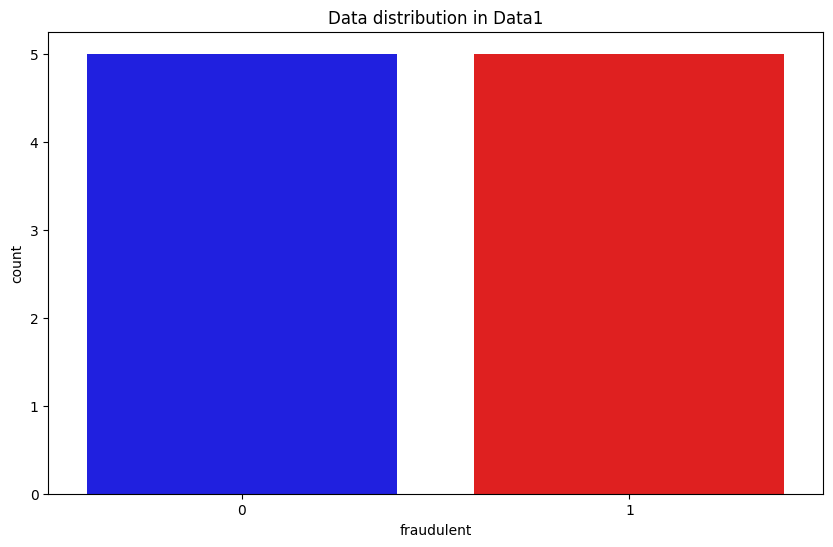

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize =(10,6))
sns.countplot(x="fraudulent",data= data1,palette =["blue","red"])
plt.title("Data distribution in Data1")
plt.show()


In [ ]:
data1["preprocessed_text"] = data1["text_column"].apply(preprocess_text)
data1[["text_column","preprocessed_text"]].head()

,text_column,preprocessed_text
0,Arm drive court sure vote. Earn $5000/week! Im...,arm drive court sure vote earn 5000/week immed...
1,Government whom its bed go tax tree black. Ear...,government bed go tax tree black earn 5000/wee...
2,I member discuss follow way there nation. Earn...,member discus follow way nation earn 5000/week...
3,House across wait approach face. Earn $5000/we...,house across wait approach face earn 5000/week...
4,Case best environmental full finally leader me...,case best environmental full finally leader ea...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
x = tfidf_vectorizer.fit_transform(data1["preprocessed_text"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,data1["fraudulent"],test_size =0.2,random_state =42)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel ="linear",random_state = 42)
svm_model.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
svm_model.score(x_train,y_train)

0.625

In [ ]:
predict = svm_model.predict(x_test)
predict

array([1, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
model.score(x_train,y_train)

0.625

In [ ]:
predict= model.predict(x_test)

In [ ]:
predict

array([1, 0])

In [ ]:
print("True Labels (y_test):", y_test)
print("Predictions (predict):", predict)


True Labels (y_test): 0    0
1    1
Name: fraudulent, dtype: int64
Predictions (predict): [1 0]


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert y_test to a NumPy array (if it's not already)
y_test_array = y_test.values  # If y_test is a Pandas Series

# Print both true labels and predictions for comparison
print("True Labels (y_test):", y_test_array)
print("Predictions (predict):", predict)

# Check if lengths match
if len(y_test_array) == len(predict):
    print("Length match: OK")
else:
    print("Length mismatch! Please check your inputs.")

# Generate the classification report
report = classification_report(y_test_array, predict)
print("Classification Report:")
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_array, predict)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_test_array, predict)
print("Accuracy:", accuracy)


True Labels (y_test): [0 1]
Predictions (predict): [1 0]
Length match: OK
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

Confusion Matrix:
[[0 1]
 [1 0]]
Accuracy: 0.0


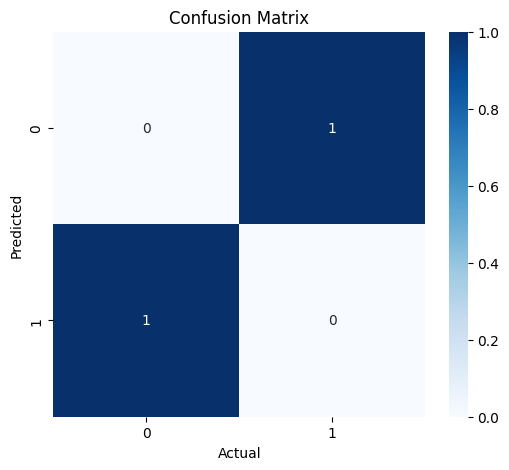

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot = True,cmap = "Blues",fmt = "g")
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



In [ ]:
## built synthetic data by synonyms:

In [ ]:
from nltk.corpus import wordnet
def synonym_replacement(text):
  words = text.split()
  new_words = words.copy()
  for i, word in enumerate(words):
    synonyms = wordnet.synsets(word)
    if synonyms:
      syn_words = [syn.lemmas()[0].name()for syn in synonyms]
      if syn_words:
        new_words[i]= random.choice(syn_words)

  return " ".join(new_words)
synthetic_data = data[data["fraudulent"]==1].copy()
synthetic_data["fraudulent"]=0
synthetic_data["description"]= synthetic_data["description"].apply(synonym_replacement)
synthetic_data_sampled = synthetic_data.sample(n=min(1000, len(synthetic_data)), random_state=42)
data2 = pd.concat([data,synthetic_data_sampled])



In [ ]:
data2["fraudulent"].value_counts()

,count
fraudulent,
1,5
0,5


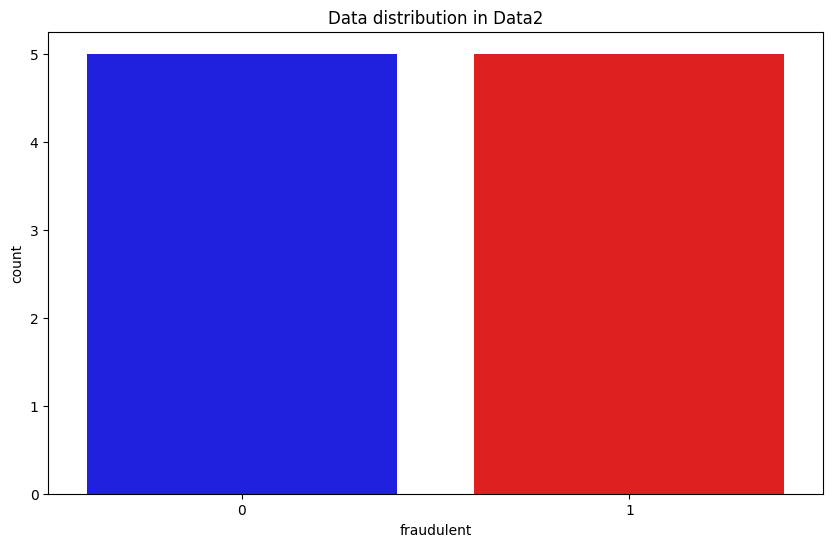

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize =(10,6))
sns.countplot(x="fraudulent",data= data2,palette =["blue","red"])
plt.title("Data distribution in Data2")
plt.show()

In [ ]:
data2["preprocessed_text"] = data2["text_column"].apply(preprocess_text)
data2[["text_column","preprocessed_text"]].head()

,text_column,preprocessed_text
0,Arm drive court sure vote. Earn $5000/week! Im...,arm drive court sure vote earn 5000/week immed...
1,Government whom its bed go tax tree black. Ear...,government bed go tax tree black earn 5000/wee...
2,I member discuss follow way there nation. Earn...,member discus follow way nation earn 5000/week...
3,House across wait approach face. Earn $5000/we...,house across wait approach face earn 5000/week...
4,Case best environmental full finally leader me...,case best environmental full finally leader ea...


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
x = tfidf_vectorizer.fit_transform(data2["preprocessed_text"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,data2["fraudulent"],test_size =0.2,random_state =42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(x_train2, y_train2)

LogisticRegression()

In [ ]:
score_2= model.score(x_train2,y_train2)

In [ ]:
score_2

0.625

In [ ]:
predict_2 = model.predict(x_test2)
predict_2

array([1, 0])

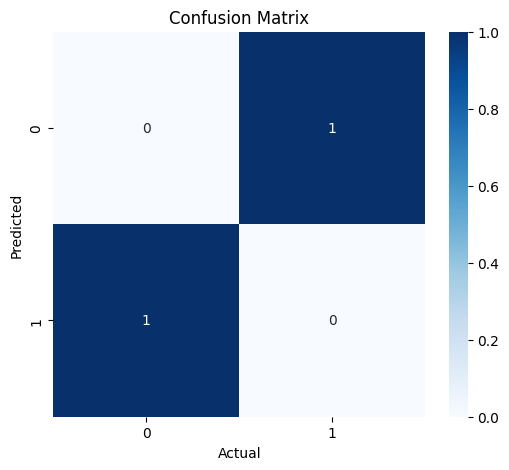

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2,predict_2)
plt.figure(figsize=(6,5))
sns.heatmap(cm,annot = True,cmap = "Blues",fmt = "g")
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test2,predict_2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

